In [136]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from astropy import units as u

Populating the interactive namespace from numpy and matplotlib


In [137]:
import os
import astropy.io.fits as fits
brickname = '1491p010' #'1491p010'#1491p010.1495p190
def chekc_fn(idx):
    fn = '/global/cscratch1/sd/desiproc/dr8-cosmos/decam-sub'+str(idx)+\
    '/tractor/149/tractor-'+brickname+'.fits'
    if os.path.isfile(fn):
        print('%d:true'%idx)
        dat = fits.getdata(fn)
        print(dat['flux_g'].mean(),dat['flux_r'].mean(),dat['flux_z'].mean())
    else:
        print('%d:false'%idx)
        
def getdata_fn(idx):
    fn = '/global/cscratch1/sd/desiproc/dr8-cosmos/decam-sub'+str(idx)+\
    '/tractor/149/tractor-'+brickname+'.fits'
    return fits.getdata(fn)

In [138]:
for i in range(10):
    chekc_fn(i)

0:true
0.0 0.0 59.1117
1:true
0.0 0.0 70.4566
2:false
3:true
19.2342 0.0 0.0
4:false
5:false
6:false
7:false
8:false
9:false


Text(0.5,1,'DR8 1495p190')

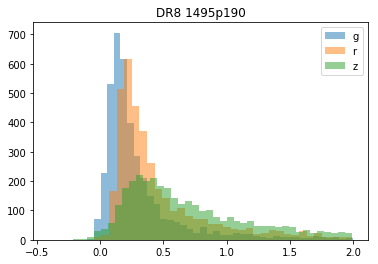

In [139]:
brickname2='1495p190'
true = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/tractor/149/'+'tractor-'+brickname2+'.fits')
true['flux_g'].mean(),true['flux_r'].mean(),true['flux_z'].mean()


sel = (true['flux_g']<2)
p1=plt.hist(true['flux_g'][sel],alpha=0.5,bins=40,label='g')
sel = (true['flux_r']<2)
p2=plt.hist(true['flux_r'][sel],alpha=0.5,bins=40,label='r')
sel = (true['flux_z']<2)
p3=plt.hist(true['flux_z'][sel],alpha=0.5,bins=40,label='z')
plt.legend()
plt.title('DR8 '+brickname2)

Text(0.5,1,'DR7 1495p190')

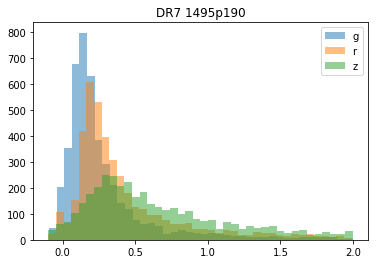

In [140]:
true = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr7/tractor/149/'+'tractor-'+brickname2+'.fits')
true['flux_g'].mean(),true['flux_r'].mean(),true['flux_z'].mean()

sel = (true['flux_g']<2)&(true['flux_g']>-0.1)
p1=plt.hist(true['flux_g'][sel],alpha=0.5,bins=40,label='g')
sel = (true['flux_r']<2)&(true['flux_r']>-0.1)
p2=plt.hist(true['flux_r'][sel],alpha=0.5,bins=40,label='r')
sel = (true['flux_z']<2)&(true['flux_z']>-0.1)
p3=plt.hist(true['flux_z'][sel],alpha=0.5,bins=40,label='z')
plt.legend()
plt.title('DR7 '+brickname2)

Text(0.5,1,'cosmos')

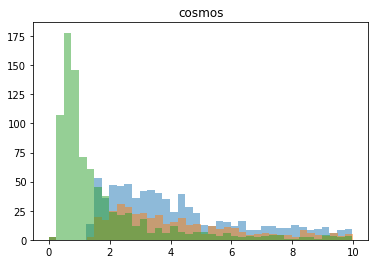

In [141]:
dat = getdata_fn(0)
sel = (dat['flux_z']<10)
p1=plt.hist(dat['flux_z'][sel],alpha=0.5,bins=40)


dat = getdata_fn(1)
sel = (dat['flux_z']<10)
p1=plt.hist(dat['flux_z'][sel],alpha=0.5,bins=40)

dat = getdata_fn(3)
sel = (dat['flux_g']<10)
p1=plt.hist(dat['flux_g'][sel],alpha=0.5,bins=40)
plt.title('cosmos')

In [142]:
dr7 = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr7/tractor/149/'+'tractor-'+brickname2+'.fits')
dr8 = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/tractor/149/'+'tractor-'+brickname2+'.fits') 
c1 = SkyCoord(ra=dr7['ra']*u.degree, dec=dr7['dec']*u.degree)
c2 = SkyCoord(ra=dr8['ra']*u.degree, dec=dr8['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1./3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]

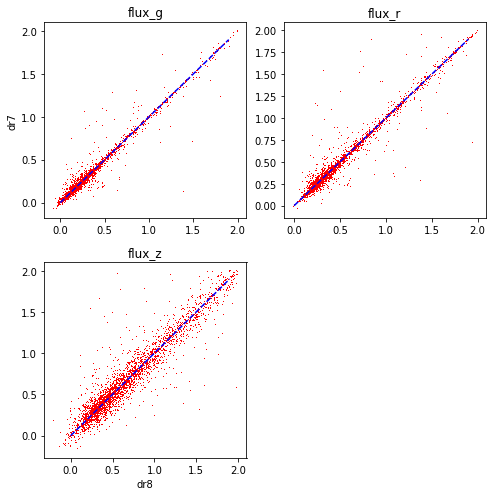

In [143]:
plt.figure(figsize=(7,7))
dr8_sort=dr8[idx2]
dr7_sort=dr7[idx1]

plt.subplot(2,2,1)
plt.ylabel('dr7')
sel = (dr8_sort['flux_g']<2)&(dr7_sort['flux_g']<2)
plt.plot(dr8_sort['flux_g'][sel],dr7_sort['flux_g'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.arange(0,2,0.1),'b--')
plt.title('flux_g')
plt.subplot(2,2,2)
sel = (dr8_sort['flux_r']<2)&(dr7_sort['flux_r']<2)
plt.plot(dr8_sort['flux_r'][sel],dr7_sort['flux_r'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.arange(0,2,0.1),'b--')
plt.title('flux_r')
plt.subplot(2,2,3)
plt.xlabel('dr8')
sel = (dr8_sort['flux_z']<2)&(dr7_sort['flux_z']<2)
plt.plot(dr8_sort['flux_z'][sel],dr7_sort['flux_z'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.arange(0,2,0.1),'b--')
plt.title('flux_z')
plt.tight_layout()

flux g:         mean diff:0.001322
flux g: squared mean diff:0.020999
flux r:         mean diff:0.000745
flux r: squared mean diff:0.030123
flux z:         mean diff:-0.001765
flux z: squared mean diff:0.093072


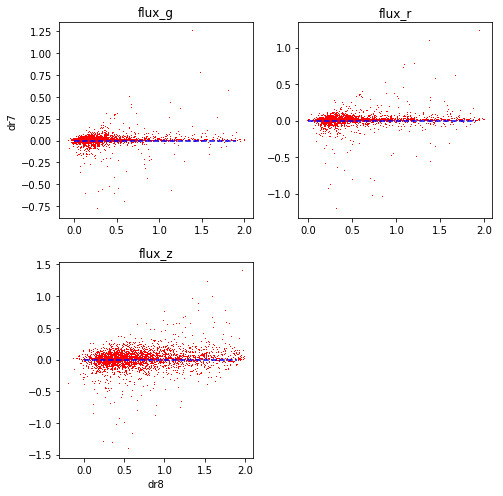

In [144]:
plt.figure(figsize=(7,7))
dr8_sort=dr8[idx2]
dr7_sort=dr7[idx1]

plt.subplot(2,2,1)
plt.ylabel('dr7')
sel = (dr8_sort['flux_g']<2)&(dr7_sort['flux_g']<2)
plt.plot(dr8_sort['flux_g'][sel],dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.zeros(20),'b--')
plt.title('flux_g')
print('flux g:         mean diff:%f'%((dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel])).mean())
print('flux g: squared mean diff:%f'%(np.sqrt((dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel])**2).mean()))
plt.subplot(2,2,2)
sel = (dr8_sort['flux_r']<2)&(dr7_sort['flux_r']<2)
plt.plot(dr8_sort['flux_r'][sel],dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.zeros(20),'b--')
plt.title('flux_r')
print('flux r:         mean diff:%f'%((dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel])).mean())
print('flux r: squared mean diff:%f'%(np.sqrt((dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel])**2).mean()))

plt.subplot(2,2,3)
plt.xlabel('dr8')
sel = (dr8_sort['flux_z']<2)&(dr7_sort['flux_z']<2)
plt.plot(dr8_sort['flux_z'][sel],dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel],'r,')
plt.plot(np.arange(0,2,0.1),np.zeros(20),'b--')
plt.title('flux_z')

print('flux z:         mean diff:%f'%((dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel])).mean())
print('flux z: squared mean diff:%f'%(np.sqrt((dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel])**2).mean()))


plt.tight_layout()

In [145]:
print('total number in dr7, dr8:')
print(len(dr7),len(dr8))

total number in dr7, dr8:
4841 4279


dr7 and dr8 have similar total distribution when matched


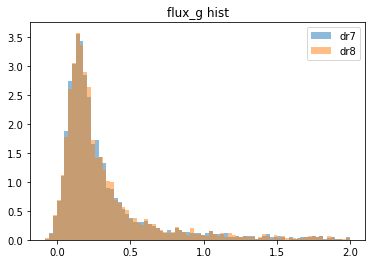

In [146]:
print('dr7 and dr8 have similar total distribution when matched')
sel = (dr7_sort['flux_g']<2)&(dr7_sort['flux_g']>-0.1)
p1=plt.hist(dr7_sort['flux_g'][sel],alpha=0.5,bins=80,density=True,label='dr7')

sel = (dr8_sort['flux_g']<2)&(dr8_sort['flux_g']>-0.1)
p1=plt.hist(dr8_sort['flux_g'][sel],alpha=0.5,bins=80,density=True,label='dr8')
plt.title('flux_g hist')
plt.legend()

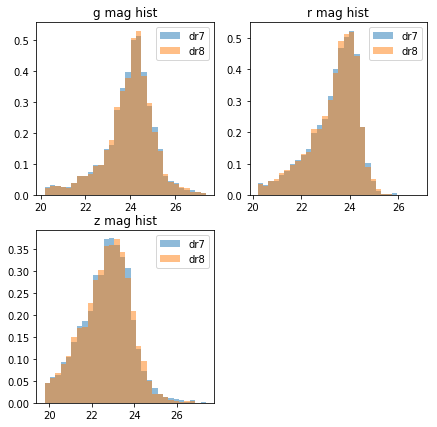

In [147]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
sel = (dr7_sort['flux_g']<8)&(dr7_sort['flux_g']>0.01)\
&(dr7_sort['NOBS_G']==dr8_sort['NOBS_G'])
dr7_g = 22.5 - 2.5 * np.log10(dr7_sort['flux_g'][sel] / dr7_sort['mw_transmission_g'][sel])
dr7_G,bins_G,u=plt.hist(dr7_g,alpha=0.5,bins=30,density=True,label='dr7')

sel = (dr8_sort['flux_g']<8)&(dr8_sort['flux_g']>0.01)\
&(dr7_sort['NOBS_G']==dr8_sort['NOBS_G'])
dr8_g = 22.5 - 2.5 * np.log10(dr8_sort['flux_g'][sel] / dr8_sort['mw_transmission_g'][sel])
dr8_G,bins_G,u2=plt.hist(dr8_g,alpha=0.5,bins=bins_G,density=True,label='dr8')
plt.title('g mag hist')
plt.legend()


plt.subplot(2,2,2)
sel = (dr7_sort['flux_r']<8)&(dr7_sort['flux_r']>0.01)\
&(dr7_sort['NOBS_R']==dr8_sort['NOBS_R'])
dr7_r = 22.5 - 2.5 * np.log10(dr7_sort['flux_r'][sel] / dr7_sort['mw_transmission_r'][sel])
dr7_R,bins_R,u=plt.hist(dr7_r,alpha=0.5,bins=30,density=True,label='dr7')

sel = (dr8_sort['flux_r']<8)&(dr8_sort['flux_r']>0.01)\
&(dr7_sort['NOBS_R']==dr8_sort['NOBS_R'])
dr8_r = 22.5 - 2.5 * np.log10(dr8_sort['flux_r'][sel] / dr8_sort['mw_transmission_r'][sel])
dr8_R,bins_R,u2=plt.hist(dr8_r,alpha=0.5,bins=bins_R,density=True,label='dr8')
plt.title('r mag hist')
plt.legend()

plt.subplot(2,2,3)
sel = (dr7_sort['flux_z']<12)&(dr7_sort['flux_z']>0.01)
#&(dr7_sort['NOBS_Z']==dr8_sort['NOBS_Z'])
dr7_z = 22.5 - 2.5 * np.log10(dr7_sort['flux_z'][sel] / dr7_sort['mw_transmission_z'][sel])
dr7_Z,bins_Z,u=plt.hist(dr7_z,alpha=0.5,bins=30,density=True,label='dr7')

sel = (dr8_sort['flux_z']<12)&(dr8_sort['flux_z']>0.01)
#&(dr7_sort['NOBS_Z']==dr8_sort['NOBS_Z'])
dr8_z = 22.5 - 2.5 * np.log10(dr8_sort['flux_z'][sel] / dr8_sort['mw_transmission_z'][sel])
dr8_Z,bins_Z,u2=plt.hist(dr8_z,alpha=0.5,bins=bins_Z,density=True,label='dr8')
plt.title('z mag hist')
plt.legend()

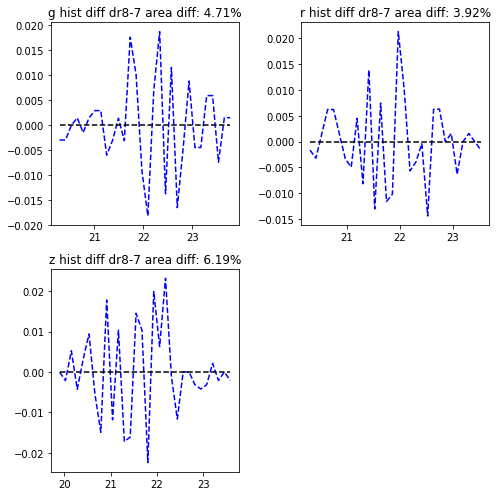

In [148]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.plot((bins_G[1:]+bins_G[:1])/2.,dr8_G-dr7_G,'b--')
plt.plot((bins_G[1:]+bins_G[:1])/2.,np.zeros(30),'k--')
area = np.fabs(dr8_G-dr7_G).sum()/dr8_G.sum()
plt.title('g hist diff dr8-7 area diff: %.2f%%'%(area*100))

plt.subplot(2,2,2)
plt.plot((bins_R[1:]+bins_R[:1])/2.,dr8_R-dr7_R,'b--')
plt.plot((bins_R[1:]+bins_R[:1])/2.,np.zeros(30),'k--')
area = np.fabs(dr8_R-dr7_R).sum()/dr8_R.sum()
plt.title('r hist diff dr8-7 area diff: %.2f%%'%(area*100))

plt.subplot(2,2,3)
plt.plot((bins_Z[1:]+bins_Z[:1])/2.,dr8_Z-dr7_Z,'b--')
plt.plot((bins_Z[1:]+bins_Z[:1])/2.,np.zeros(30),'k--')
area = np.fabs(dr8_Z-dr7_Z).sum()/dr8_Z.sum()
plt.title('z hist diff dr8-7 area diff: %.2f%%'%(area*100))

plt.tight_layout()

dr7 have more faint galaxies


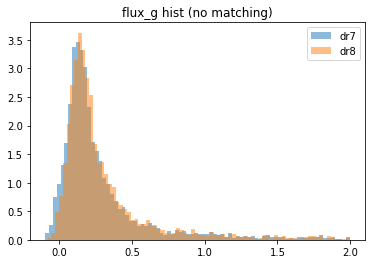

In [11]:
print('dr7 have more faint galaxies')
sel = (dr7['flux_g']<2)&(dr7['flux_g']>-0.1)
p1=plt.hist(dr7['flux_g'][sel],alpha=0.5,bins=80,density=True,label='dr7')

sel = (dr8['flux_g']<2)&(dr8['flux_g']>-0.1)
p1=plt.hist(dr8['flux_g'][sel],alpha=0.5,bins=80,density=True,label='dr8')
plt.title('flux_g hist (no matching)')
plt.legend()

In [12]:
cosmos = getdata_fn(3)#flux_z01,g3
print(len(cosmos))
brickname_cosmos = '1491p010'
dr8_c = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/tractor/149/'+'tractor-'+brickname_cosmos+'.fits')

c1 = SkyCoord(ra=cosmos['ra']*u.degree, dec=cosmos['dec']*u.degree)
c2 = SkyCoord(ra=dr8_c['ra']*u.degree, dec=dr8_c['dec']*u.degree)
idx, d2d, d3d = c1.match_to_catalog_sky(c2)
w = d2d.value <= 1./3600
idx[~w] = -1
idx1 = np.where(w)[0]
idx2 = idx[idx>-1]

dr8c_sort=dr8_c[idx2]
cosmos_sort=cosmos[idx1]
print(len(dr8c_sort))

974
947


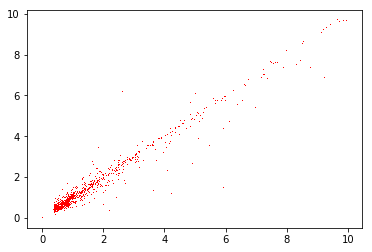

In [13]:
sel = (cosmos_sort['flux_g']<10)&(dr8c_sort['flux_g']<10)
plt.plot(cosmos_sort['flux_g'][sel],dr8c_sort['flux_g'][sel],'r,')

In [14]:
len(dr8_sort),len(cosmos_sort)

(4071, 947)

In [22]:
#cosmos-dr8 result is not making sense to me...

In [15]:
#std=0.02, this is not very small
g     = 22.5 - 2.5 * np.log10(0.5 / 0.95)
g2     = 22.5 - 2.5 * np.log10(0.52 / 0.95)

In [16]:
g-g2,g,g2

(0.042583348246953534, 23.196884002382074, 23.15430065413512)

In [135]:
22.5 - 2.5 * np.log10(0.9 / 0.95),22.5 - 2.5 * np.log10(1.2 / 0.95)

(22.558702739623808, 22.246355898103058)

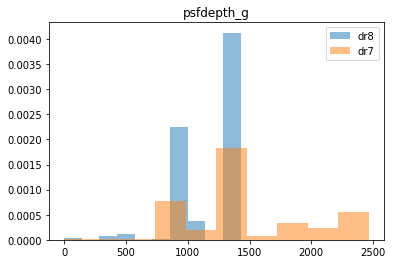

In [17]:
plt.title('psfdepth_g')
p1=plt.hist(dr8['psfdepth_g'],density=True,alpha=0.5,label='dr8')
p2=plt.hist(dr7['psfdepth_g'],density=True,alpha=0.5,label='dr7')
plt.legend()

In [18]:
dr8['psfdepth_g'].max(),dr7['psfdepth_g'].max()

(1427.4515, 2463.3201)

In [19]:
obiwan = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/dr8_10deg2/tractor/149/1495p190/rs0/'+\
'tractor-'+brickname2+'.fits'
obiwan = fits.getdata(obiwan)

In [20]:
obiwan['psfdepth_g'].max()

1427.4515

Text(0.5,1,'psfdepth_g dr8')

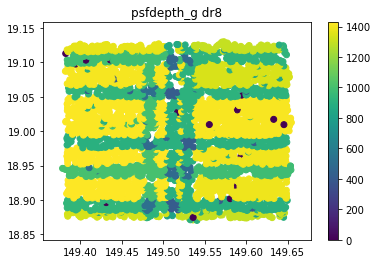

In [21]:
plt.scatter(dr8['ra'],dr8['dec'],c=dr8['psfdepth_g'])
plt.colorbar()
plt.title('psfdepth_g dr8')

Text(0.5,1,'psfdepth_g dr7')

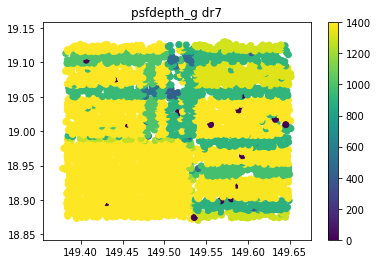

In [22]:
plt.scatter(dr7['ra'],dr7['dec'],c=dr7['psfdepth_g'],vmax=1400)
plt.colorbar()
plt.title('psfdepth_g dr7')

In [23]:
dr8['galdepth_g'].max(),dr7['galdepth_g'].max()

(827.17816, 1432.4642)

In [24]:
dr8['flux_ivar_g'].max(),dr7['flux_ivar_g'].max()

(1487.1007, 2513.9917)

In [25]:
dat = fits.getdata('/global/project/projectdirs/cosmo/data/legacysurvey/dr8/south/sweep/8.0/sweep-140p010-150p015.fits')
dat['psfdepth_g'].max()

3630.1204

Text(0.5,1,'psfdepth_g dr8 obiwan  sim')

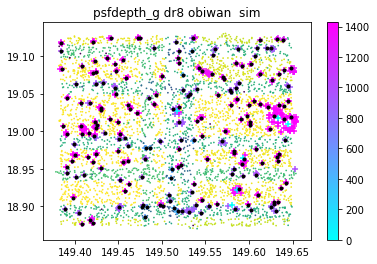

In [26]:
sim = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/dr8_10deg2/obiwan/149/1495p190/rs0/'+\
'simcat-elg-'+brickname2+'.fits'
sim = fits.getdata(sim)
plt.scatter(dr8['ra'],dr8['dec'],c=dr8['psfdepth_g'],s=0.5)
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['psfdepth_g'],marker='+',cmap='cool')
plt.colorbar()
plt.plot(sim['ra'],sim['dec'],'k.')
plt.title('psfdepth_g dr8 obiwan  sim')

Text(0.5,1,'zoom in -- looking consistent')

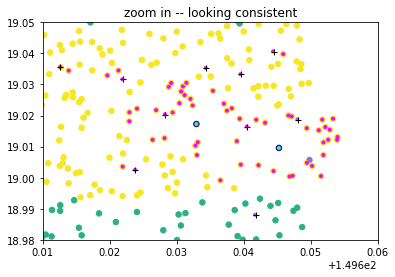

In [27]:
plt.scatter(dr8['ra'],dr8['dec'],c=dr8['psfdepth_g'],s=30)
plt.scatter(obiwan['ra'],obiwan['dec'],c=obiwan['psfdepth_g'],marker='.',cmap='cool')
plt.plot(sim['ra'],sim['dec'],'k+')
plt.gca().set_xlim((149.61,149.66))
plt.gca().set_ylim((18.98,19.05))
plt.title('zoom in -- looking consistent')

Text(0.5,1,'flux_g masked dr8-dr7')

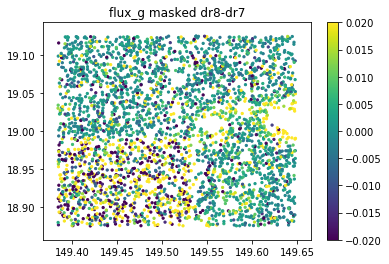

In [28]:
sel = (dr8_sort['flux_g']<2)&(dr7_sort['flux_g']<2)&(dr8_sort['maskbits']==0)
plt.scatter(dr8_sort['ra'][sel],dr8_sort['dec'][sel],\
            c=dr8_sort['flux_g'][sel]-dr7_sort['flux_g'][sel]
           ,vmax=0.02,vmin=-0.02,s=5)
plt.colorbar()

plt.title('flux_g masked dr8-dr7')

Text(0.5,1,'NOBS_G #of exposures dr8-7')

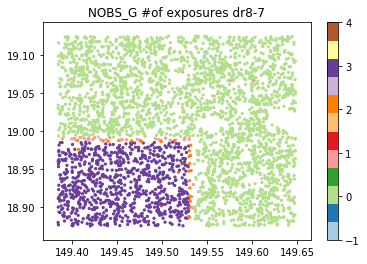

In [29]:
sel = (dr8_sort['flux_g']<2)&(dr7_sort['flux_g']<2)&(dr8_sort['maskbits']==0)
plt.scatter(dr8_sort['ra'][sel],dr8_sort['dec'][sel],\
            c=dr7_sort['NOBS_G'][sel]-dr8_sort['NOBS_G'][sel]
           ,s=5,cmap='Paired')
plt.colorbar()
plt.title('NOBS_G #of exposures dr8-7')

Text(0.5,1,'flux_r dr8-dr7')

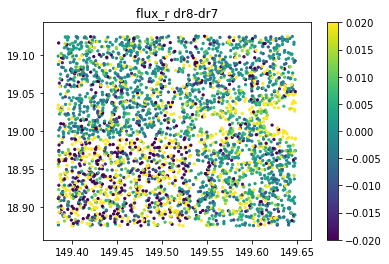

In [50]:
sel = (dr8_sort['flux_r']<5)&(dr7_sort['flux_r']<5)&(dr8_sort['maskbits']==0)
plt.scatter(dr8_sort['ra'][sel],dr8_sort['dec'][sel],\
            c=dr8_sort['flux_r'][sel]-dr7_sort['flux_r'][sel]
           ,vmax=0.02,vmin=-0.02,s=5)
plt.colorbar()
plt.title('flux_r dr8-dr7')

Text(0.5,1,'NOBS_R #of exposures dr8-7')

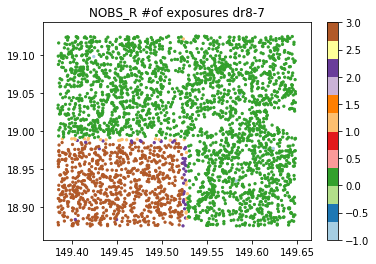

In [51]:
sel = (dr8_sort['flux_r']<2)&(dr7_sort['flux_r']<2)&(dr8_sort['maskbits']==0)
plt.scatter(dr8_sort['ra'][sel],dr8_sort['dec'][sel],\
            c=dr7_sort['NOBS_R'][sel]-dr8_sort['NOBS_R'][sel],cmap='Paired'
           ,s=5)
plt.colorbar()
plt.title('NOBS_R #of exposures dr8-7')

Text(0.5,1,'flux_z dr8-dr7')

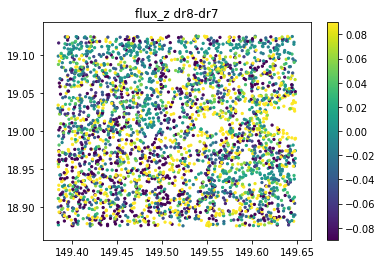

In [52]:
sel = (dr8_sort['flux_z']<5)&(dr7_sort['flux_z']<5)&(dr8_sort['maskbits']==0)
plt.scatter(dr8_sort['ra'][sel],dr8_sort['dec'][sel],\
            c=dr8_sort['flux_z'][sel]-dr7_sort['flux_z'][sel]
           ,vmax=0.09,vmin=-0.09,s=5)
plt.colorbar()
plt.title('flux_z dr8-dr7')

Text(0.5,1,'NOBS_Z #of exposures dr8-7')

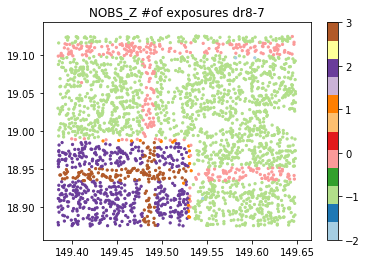

In [53]:
sel = (dr8_sort['flux_z']<2)&(dr7_sort['flux_z']<2)&(dr8_sort['maskbits']==0)
plt.scatter(dr8_sort['ra'][sel],dr8_sort['dec'][sel],\
            c=dr7_sort['NOBS_Z'][sel]-dr8_sort['NOBS_Z'][sel]
           ,s=5,cmap = 'Paired')
plt.colorbar()
plt.title('NOBS_Z #of exposures dr8-7')

In [36]:
#conclusion:
'''
1. exposure time makes a big difference
2. there are some difference around bright stars
3. in cosmos region, dr7 have more faint objects, because it has a higher depth
4. in regions with same exposures, differences mainly come from around bright sources,
other places have similar distribution
5. the histogram are very similar when dr8,dr7 gets matched, so it should be fine to use 
dr7 as the truth. (It's macroscpoically correct, and we just care about macroscopic behavior
when conducting obiwan, I will use dr7 cosmos field in the future.)
'''

"\n1. exposure time makes a big difference\n2. there are some difference around bright stars\n3. in cosmos region, dr7 have more faint objects, because it has a higher depth\n4. in regions with same exposures, differences mainly come from around bright sources,\nother places have similar distribution\n5. the histogram are very similar when dr8,dr7 gets matched, so it should be fine to use \ndr7 as the truth. (It's macroscpoically correct, and we just care about macroscopic behavior\nwhen conducting obiwan, I will use dr7 cosmos field in the future.)\n"